In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#importing csv file
df = pd.read_csv("C:/Users/vinod/OneDrive/Desktop/Uber Request Data.csv")

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [5]:
#Inspecting the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
df.shape

(6745, 6)

In [7]:
#Inspecting Null values
df.isnull().sum(axis=0)
#Driver id and Drop timestamp has null values

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
#converting Request timestamp and Drop timestamp to datetime

df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [9]:
#extracting date, time and week from request timestamp

df['Request Date'] = df['Request timestamp'].dt.date
df['Request time'] = df['Request timestamp'].dt.time
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16


In [10]:
#extracting hour from Drop timestamp

df['Drop Date'] = df['Drop timestamp'].dt.date
df['Drop Time'] = df['Drop timestamp'].dt.time
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request time,Drop Date,Drop Time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,2016-12-07,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,2016-12-07,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47


In [11]:
#extracting hour from Request timestamp
df['Request hour'] = df['Request timestamp'].dt.hour
df['No of Requests'] = 1
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request time,Drop Date,Drop Time,Request hour,No of Requests
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00,11,1
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00,17,1
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,2016-12-07,09:58:00,9,1
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,2016-12-07,22:03:00,21,1
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,8,1


In [12]:
# creating time slot for request hour
df.loc[df['Request hour'].between(0,3, inclusive=True),'timeslot'] = 'Late Night'
df.loc[df['Request hour'].between(4,6, inclusive=True),'timeslot'] = 'Early Morning'
df.loc[df['Request hour'].between(7,12, inclusive=True),'timeslot'] = 'Morning'
df.loc[df['Request hour'].between(13,17, inclusive=True),'timeslot'] = 'Afternoon'
df.loc[df['Request hour'].between(18,20, inclusive=True),'timeslot'] = 'Evening'
df.loc[df['Request hour'].between(21,24, inclusive=True),'timeslot'] = 'Night'
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request time,Drop Date,Drop Time,Request hour,No of Requests,timeslot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00,11,1,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00,17,1,Afternoon
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,2016-12-07,09:58:00,9,1,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,2016-12-07,22:03:00,21,1,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,8,1,Morning


# Analysis

In [13]:
total = df.groupby(by = ['Status'])['Request id'].count()
total.head()

Status
Cancelled            1264
No Cars Available    2650
Trip Completed       2831
Name: Request id, dtype: int64

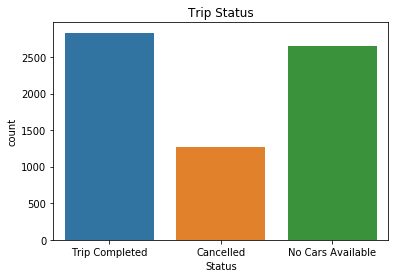

In [14]:
plt.title('Trip Status')
sns.countplot(df['Status'])
plt.show()

only half of the requests from city and airport request gets completed

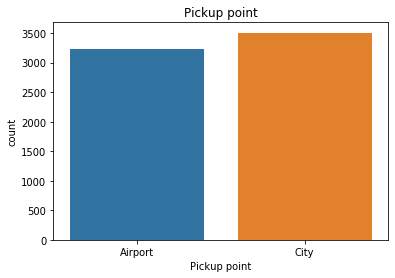

In [15]:
plt.title('Pickup point')
sns.countplot(df['Pickup point'])
plt.show()

There is not much difference in airport and city pickup requests.

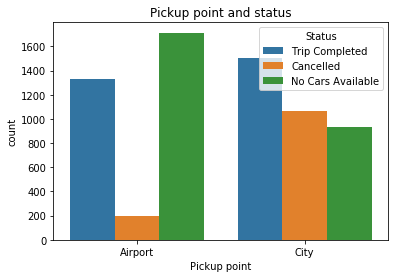

In [16]:
plt.title("Pickup point and status")
sns.countplot(x=df['Pickup point'],hue ='Status',data = df)
plt.show()

The cars are Cancelled more from City to Airport and cars are mostly not available from Airport to City..

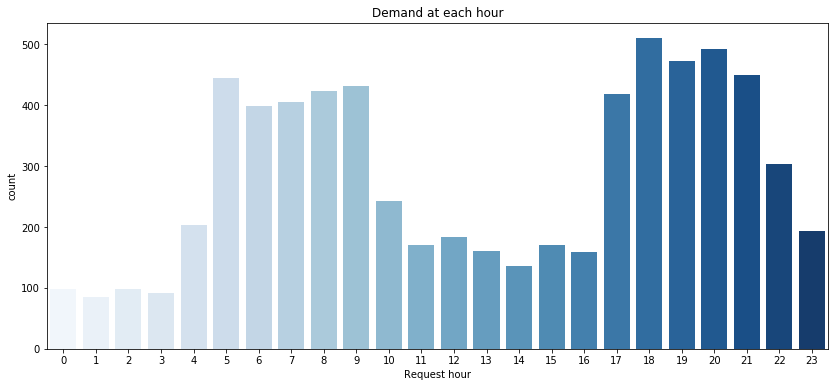

In [17]:
#plotting the graph for the total requests at each hour
plt.figure(figsize=(14, 6))
plt.title('Demand at each hour')
sns.countplot(x='Request hour', data=df,palette='Blues')
plt.show()

There are high requests from 5am to 9am and 5pm to 10 pm

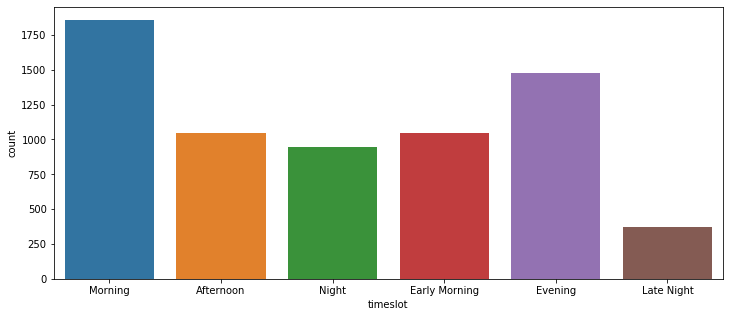

In [18]:
#insights in request timeslot
plt.figure(figsize=(12, 5))
t =sns.countplot(x='timeslot', data=df)
plt.show()

From the plot it is clear that most of the requests are got in morning and evening slots

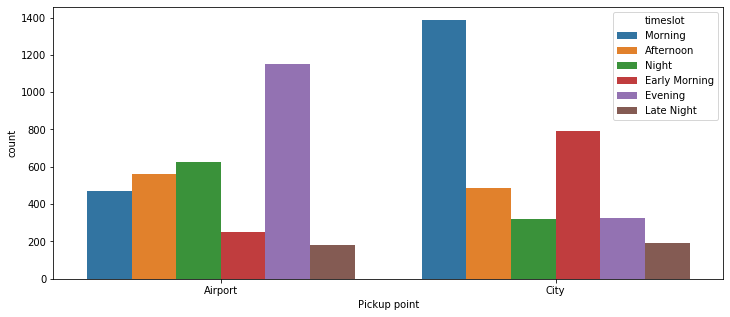

In [19]:
#performing segmented univariate analysis
plt.figure(figsize=(12, 5))
sns.countplot(x='Pickup point', hue="timeslot", data=df)
plt.show()

Airport has the hightest request in the evening and City has the hightest request in the morning

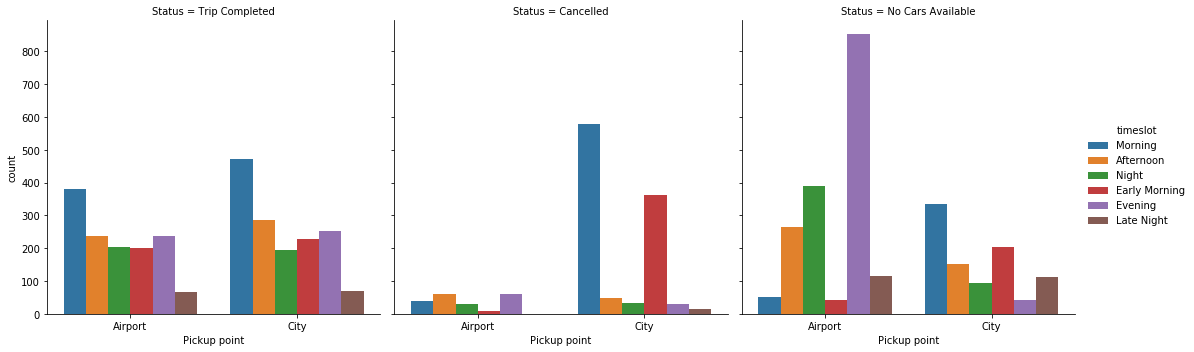

In [20]:
#segmented analysis for pickup point, status, timeslot
sns.catplot(x='Pickup point',col="Status", hue='timeslot',data=df ,kind="count")
plt.show()

Most of the requests are got cancelled in the morning in city and airport requests during the evening slot when the demand is high there are no cars available

# Calculating Supply and demand gap

In [21]:
#calculating the status for all the requests at each hour
df['Request Hour'] = df['Request timestamp'].dt.hour
dfgroup = df.groupby(by = ['Status', 'Request Hour'])['No of Requests'].count().unstack()
dfgroup = dfgroup.fillna(0)
dfgroup.T

Status,Cancelled,No Cars Available,Trip Completed
Request Hour,,,
0,3,56,40
1,4,56,25
2,5,57,37
3,2,56,34
4,51,74,78
5,176,84,185
6,145,86,167
7,169,63,174
8,178,90,155


In [22]:
#calculating the requests and status at different pickup points at each hour
dfgroup2 = df.groupby(by = ['Pickup point', 'Status', 'Request Hour'])['No of Requests'].count().unstack()
dfgroup2 = dfgroup2.fillna(0)
dfgroup2.T

Pickup point   Airport                                       City  \
Status       Cancelled No Cars Available Trip Completed Cancelled   
Request Hour                                                        
0                  0.0              30.0           23.0       3.0   
1                  0.0              29.0           13.0       4.0   
2                  0.0              25.0           16.0       5.0   
3                  0.0              30.0           15.0       2.0   
4                  2.0              34.0           36.0      49.0   
5                  4.0               3.0           85.0     172.0   
6                  4.0               4.0           81.0     141.0   
7                  5.0               3.0           75.0     164.0   
8                  2.0               4.0           67.0     176.0   
9                  8.0               7.0           74.0     167.0   
10                 9.0              13.0           53.0      53.0   
11                 5.0              10.0           49.0      10.0   
12                10.0              14.0           63.0       9.0   
13                 9.0              21.0           35.0       9.0   
14                 6.0               7.0           37.0       5.0   
15                11.0              13.0           52.0      10.0   
16                14.0               9.0           38.0       8.0   
17                19.0             215.0           74.0      16.0   
18                15.0             309.0           81.0       9.0   
19                15.0             268.0           83.0       9.0   
20                29.0             275.0           74.0      12.0   
21                28.0             254.0           61.0      14.0   
22                 3.0             100.0           80.0       9.0   
23                 0.0              36.0           62.0      10.0   

Pickup point                                   
Status       No Cars Available Trip Completed  
Request Hour                                   
0                         26.0           17.0  
1                         27.0           12.0  
2                         32.0           21.0  
3                         26.0           19.0  
4                         40.0           42.0  
5                         81.0          100.0  
6                         82.0           86.0  
7                         60.0           99.0  
8                         86.0           88.0  
9                         76.0           99.0  
10                        52.0           63.0  
11                        31.0           66.0  
12                        30.0           58.0  
13                        32.0           54.0  
14                        30.0           51.0  
15                        35.0           50.0  
16                        37.0           53.0  
17                        17.0           77.0  
18                        13.0           83.0  
19                        15.0           83.0  
20                        15.0           87.0  
21                        11.0           81.0  
22                        38.0           74.0  
23                        45.0           41.0

# Demand and Supply Gap from Airport to city

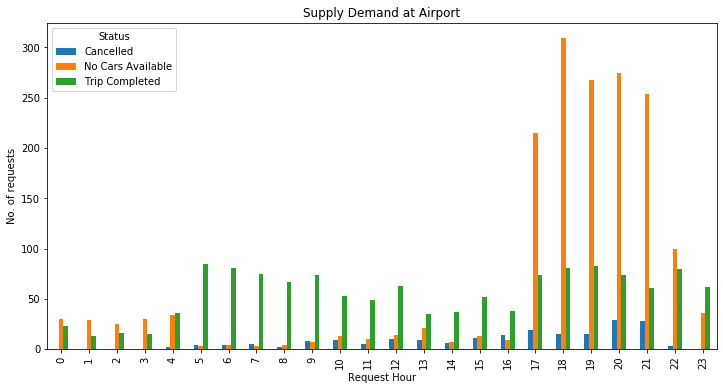

In [23]:
#The status of requests at airport at each hour
dfgroup2.loc['Airport'].T.plot(kind = 'bar', figsize = (12,6))
plt.ylabel('No. of requests')
plt.title('Supply Demand at Airport')
plt.show()

The requests are high at airport in Evening hours and cars are not available

In [23]:
#calculating demand and supply at Airport
dfAirport = dfgroup2.loc['Airport'].T

dfAirport['TotalRequests'] = dfAirport['Cancelled'] +  dfAirport['No Cars Available'] + dfAirport['Trip Completed']
dfAirport['SupplyGap'] = dfAirport['TotalRequests'] - dfAirport['Cancelled'] +  dfAirport['No Cars Available']
dfAirport.head()

Status,Cancelled,No Cars Available,Trip Completed,TotalRequests,SupplyGap
Request Hour,,,,,
0,0.0,30.0,23.0,53.0,83.0
1,0.0,29.0,13.0,42.0,71.0
2,0.0,25.0,16.0,41.0,66.0
3,0.0,30.0,15.0,45.0,75.0
4,2.0,34.0,36.0,72.0,104.0


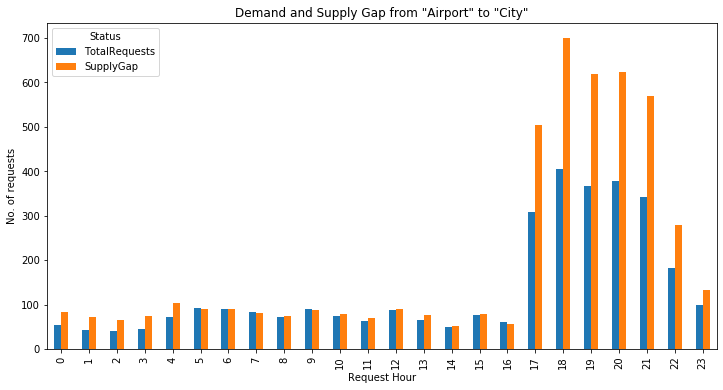

In [24]:
#Analysing Demand and Supply Gap from "Airport" to "City"

dfAirport.loc[:,['TotalRequests', 'SupplyGap']].plot(kind = 'bar', figsize=(12,6))
plt.title('Demand and Supply Gap from "Airport" to "City"')
plt.ylabel('No. of requests')
plt.show()

AS the cars are not available at airport the demand is high and the supply gap is more

# Demand Supply Gap from City to Airport

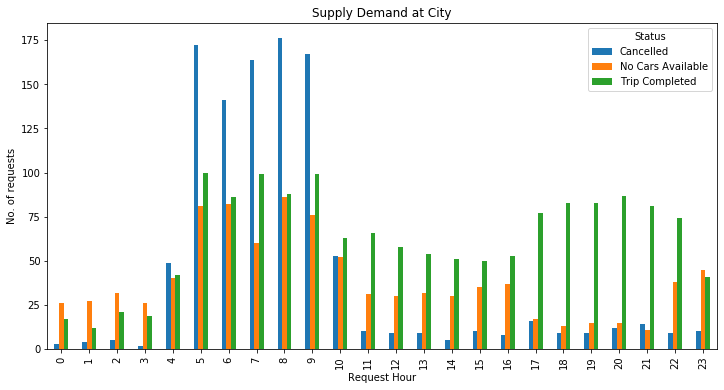

In [26]:
#The status of requests at city at each hour
dfgroup2.loc['City'].T.plot(kind = 'bar', figsize=(12,6))
plt.ylabel('No. of requests')
plt.title('Supply Demand at City')
plt.show()

The requests are high at city in Morning hours and trips are cancelled more

In [27]:
#calculating demand and supply at Airport

dfCity = dfgroup2.loc['City'].T
dfCity['TotalRequests'] = dfCity['Cancelled'] +  dfCity['No Cars Available'] + dfCity['Trip Completed']
dfCity['SupplyGap'] = dfCity['TotalRequests'] - dfCity['Cancelled'] +  dfCity['No Cars Available']
dfCity.head()

Status,Cancelled,No Cars Available,Trip Completed,TotalRequests,SupplyGap
Request Hour,,,,,
0,3.0,26.0,17.0,46.0,69.0
1,4.0,27.0,12.0,43.0,66.0
2,5.0,32.0,21.0,58.0,85.0
3,2.0,26.0,19.0,47.0,71.0
4,49.0,40.0,42.0,131.0,122.0


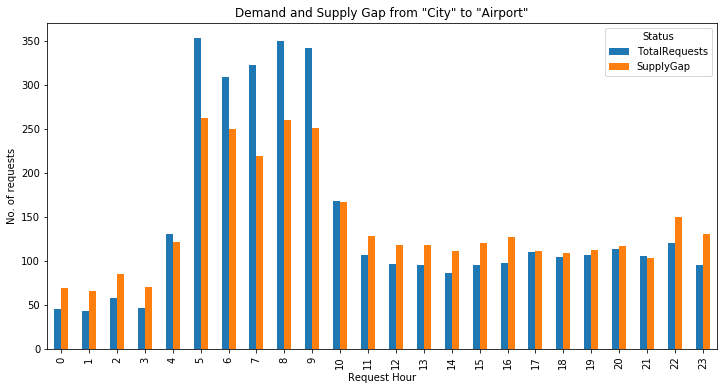

In [28]:
#Analysing Demand and Supply Gap from "City" to "Airport"
dfCity.loc[:, ['TotalRequests', 'SupplyGap']].plot(kind = 'bar', figsize=(12,6))
plt.title('Demand and Supply Gap from "City" to "Airport"')
plt.ylabel('No. of requests')
plt.show()

AS the drivers are cancelling the requests to airport the demand is high and the supply gap is more at morning in the city